<a href="https://colab.research.google.com/github/rofiat13/projects/blob/main/king_county_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')
#eval_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')

In [3]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#eval_data.head()

In [5]:
house_data.shape
#print(eval_data.shape)

(16613, 19)

In [6]:
house_data.info()
#print(eval_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16613 entries, 0 to 16612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16613 non-null  float64
 1   bedrooms       16613 non-null  int64  
 2   bathrooms      16613 non-null  float64
 3   sqft_living    16613 non-null  int64  
 4   sqft_lot       16613 non-null  int64  
 5   floors         16613 non-null  float64
 6   waterfront     16613 non-null  int64  
 7   view           16613 non-null  int64  
 8   condition      16613 non-null  int64  
 9   grade          16613 non-null  int64  
 10  sqft_above     16613 non-null  int64  
 11  sqft_basement  16613 non-null  int64  
 12  yr_built       16613 non-null  int64  
 13  yr_renovated   16613 non-null  int64  
 14  zipcode        16613 non-null  int64  
 15  lat            16613 non-null  float64
 16  long           16613 non-null  float64
 17  sqft_living15  16613 non-null  int64  
 18  sqft_l

In [7]:
house_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
house_data.describe()
#print(eval_data.describe())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.661300e+04,16613.000000,16613.000000,16613.000000,1.661300e+04,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000
mean,5.335161e+05,3.365918,2.062090,2053.860531,1.573761e+04,1.432553,0.007946,0.244026,3.449708,7.592608,1750.210859,303.649672,1967.297418,89.855234,98078.162283,47.560026,-122.215380,1974.793776,13287.334256
std,3.665165e+05,0.937185,0.758786,904.438391,4.195449e+04,0.509669,0.088786,0.781695,0.666582,1.168420,804.771068,450.701536,27.936716,413.846846,54.152178,0.139708,0.138657,673.022438,27456.421787
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1414.000000,5.454000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,47.464600,-122.327000,1490.000000,5421.000000
50%,4.470000e+05,3.000000,2.000000,1900.000000,7.902000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573000,-122.231000,1830.000000,7823.000000
75%,6.387000e+05,4.000000,2.500000,2500.000000,1.107000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,98118.000000,47.679000,-122.127000,2330.000000,10327.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


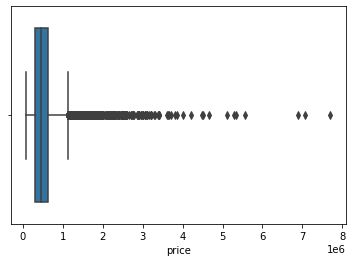

In [9]:
sns.boxplot(x= 'price', data=house_data)

In [10]:
from seaborn.utils import iqr
Q1= house_data.quantile(0.25)
Q3= house_data.quantile(0.75)
IQR= Q3-Q1
print(IQR)

price            323700.0000
bedrooms              1.0000
bathrooms             1.0000
sqft_living        1086.0000
sqft_lot           5616.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             1.0000
grade                 1.0000
sqft_above          960.0000
sqft_basement       600.0000
yr_built             40.0000
yr_renovated          0.0000
zipcode              85.0000
lat                   0.2144
long                  0.2000
sqft_living15       840.0000
sqft_lot15         4906.0000
dtype: float64


In [11]:
print(house_data<(Q1-1.5*IQR)) or (house_data>Q3+1.5*IQR)

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      False     False      False        False     False   False       False   
1      False     False      False        False     False   False       False   
2      False     False      False        False     False   False       False   
3      False     False      False        False     False   False       False   
4      False     False      False        False     False   False       False   
...      ...       ...        ...          ...       ...     ...         ...   
16608  False     False      False        False     False   False       False   
16609  False     False      False        False     False   False       False   
16610  False     False      False        False     False   False       False   
16611  False     False      False        False     False   False       False   
16612  False     False      False        False     False   False       False   

        view  condition  grade  sqft_ab

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
print(house_data['price'].quantile(0.5))
print(house_data['price'].quantile(0.95))
print(house_data['price'].quantile(0.75))

447000.0
1145000.0
638700.0


In [13]:
house_data['price']=np.where(house_data['price']>1145000.0,638700.0,house_data['price'])
house_data['price'].describe()

count    1.661300e+04
mean     4.815958e+05
std      2.077961e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.470000e+05
75%      6.387000e+05
max      1.145000e+06
Name: price, dtype: float64

In [14]:
print(house_data['sqft_living'].quantile(0.5))
print(house_data['sqft_living'].quantile(0.95))
print(house_data['sqft_living'].quantile(0.75))

1900.0
3720.0
2500.0


In [15]:
house_data['sqft_living']=np.where(house_data['sqft_living']>3720.0,2500.0,house_data['sqft_living'])
house_data['sqft_living'].describe()

count    16613.000000
mean      1954.513875
std        689.410852
min        370.000000
25%       1414.000000
50%       1900.000000
75%       2500.000000
max       3720.000000
Name: sqft_living, dtype: float64

In [16]:
print(house_data['sqft_lot'].quantile(0.5))
print(house_data['sqft_lot'].quantile(0.95))
print(house_data['sqft_lot'].quantile(0.75))

7902.0
44378.0
11070.0


In [17]:
house_data['sqft_lot']=np.where(house_data['sqft_lot']>44378.0,11070.0,house_data['sqft_lot'])
house_data['sqft_lot'].describe()

count    16613.000000
mean      9411.099741
std       6824.351184
min        520.000000
25%       5454.000000
50%       7902.000000
75%      11070.000000
max      44374.000000
Name: sqft_lot, dtype: float64

In [18]:
print(house_data['sqft_above'].quantile(0.5))
print(house_data['sqft_above'].quantile(0.95))
print(house_data['sqft_above'].quantile(0.75))

1530.0
3310.0
2140.0


In [19]:
house_data['sqft_above']=np.where(house_data['sqft_above']>3310.0,2140.0,house_data['sqft_above'])
house_data['sqft_above'].describe()

count    16613.000000
mean      1658.975561
std        612.137008
min        370.000000
25%       1180.000000
50%       1530.000000
75%       2140.000000
max       3310.000000
Name: sqft_above, dtype: float64

In [20]:
print(house_data['sqft_basement'].quantile(0.5))
print(house_data['sqft_basement'].quantile(0.95))
print(house_data['sqft_basement'].quantile(0.75))

0.0
1200.0
600.0


In [21]:
house_data['sqft_basement']=np.where(house_data['sqft_basement']>1200.0,600.0,house_data['sqft_basement'])
house_data['sqft_basement'].describe()

count    16613.000000
mean       259.122976
std        358.159582
min          0.000000
25%          0.000000
50%          0.000000
75%        600.000000
max       1200.000000
Name: sqft_basement, dtype: float64

In [22]:
print(house_data['yr_built'].quantile(0.5))
print(house_data['yr_built'].quantile(0.95))
print(house_data['yr_built'].quantile(0.75))

1969.0
2005.0
1990.0


In [23]:
house_data['yr_built']=np.where(house_data['yr_built']>2005.0,1990.0,house_data['yr_built'])
house_data['yr_built'].describe()

count    16613.000000
mean      1966.392945
std         26.855659
min       1900.000000
25%       1950.000000
50%       1969.000000
75%       1990.000000
max       2005.000000
Name: yr_built, dtype: float64

In [24]:
print(house_data['zipcode'].quantile(0.5))
print(house_data['zipcode'].quantile(0.95))
print(house_data['zipcode'].quantile(0.75))

98065.0
98177.0
98118.0


In [25]:
house_data['zipcode']=np.where(house_data['zipcode']>98177.0,98118.0,house_data['zipcode'])
house_data['zipcode'].describe()

count    16613.000000
mean     98074.578764
std         48.652762
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98177.000000
Name: zipcode, dtype: float64

In [26]:
print(house_data['lat'].quantile(0.5))
print(house_data['lat'].quantile(0.95))
print(house_data['lat'].quantile(0.75))

47.573
47.7508
47.679


In [27]:
house_data['lat']=np.where(house_data['lat']>47.7508,47.679,house_data['lat'])
house_data['lat'].describe()

count    16613.000000
mean        47.555739
std          0.134571
min         47.155900
25%         47.464600
50%         47.573000
75%         47.679000
max         47.750800
Name: lat, dtype: float64

In [28]:
print(house_data['long'].quantile(0.5))
print(house_data['long'].quantile(0.95))
print(house_data['long'].quantile(0.75))

-122.231
-121.9856
-122.127


In [29]:
house_data['long']=np.where(house_data['long']>-121.9856,-122.127,house_data['long'])
house_data['long'].describe()

count    16613.000000
mean      -122.227690
std          0.115488
min       -122.519000
25%       -122.327000
50%       -122.231000
75%       -122.127000
max       -121.986000
Name: long, dtype: float64

In [30]:
print(house_data['sqft_living15'].quantile(0.5))
print(house_data['sqft_living15'].quantile(0.95))
print(house_data['sqft_living15'].quantile(0.75))

1830.0
3260.0
2330.0


In [31]:
house_data['sqft_living15']=np.where(house_data['sqft_living15']>3260.0,2330.0,house_data['sqft_living15'])
house_data['sqft_living15'].describe()

count    16613.000000
mean      1904.020646
std        535.120787
min        399.000000
25%       1490.000000
50%       1830.000000
75%       2330.000000
max       3260.000000
Name: sqft_living15, dtype: float64

In [32]:
print(house_data['sqft_lot15'].quantile(0.5))
print(house_data['sqft_lot15'].quantile(0.95))
print(house_data['sqft_lot15'].quantile(0.75))

7823.0
38084.19999999998
10327.0


In [33]:
house_data['sqft_lot15']=np.where(house_data['sqft_lot15']>38084.19999999998,10327.0,house_data['sqft_lot15'])
house_data['sqft_lot15'].describe()

count    16613.000000
mean      8783.233733
std       5628.974591
min        660.000000
25%       5421.000000
50%       7823.000000
75%      10327.000000
max      38061.000000
Name: sqft_lot15, dtype: float64

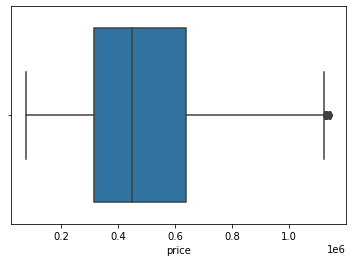

In [34]:
sns.boxplot(x= 'price', data=house_data)

In [35]:
y=house_data['price']
x=house_data.drop(labels=['price'],axis=1)

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [37]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [38]:
from sklearn.decomposition import PCA
pca= PCA()
pca.fit(x_train)

PCA()

In [39]:
pca.n_components_

18

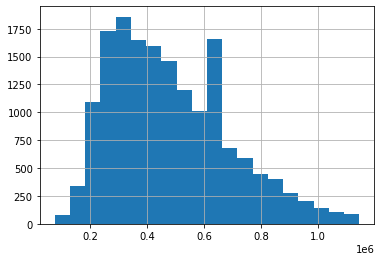

In [40]:
house_data['price'].hist(bins=20)

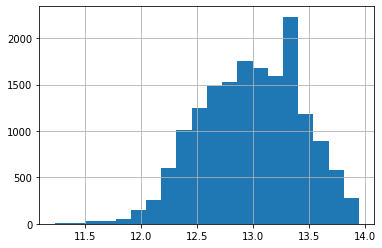

In [41]:
np.log(house_data['price']).hist(bins=20)

In [42]:
pca.transform(x_train)
pca.transform(x_test)

array([[-2.05161466,  1.03407151,  0.05802163, ...,  0.20949679,
        -0.03342503,  0.03821593],
       [-0.20565954,  1.91579987, -0.60503288, ..., -0.662169  ,
         0.28117341,  0.08284489],
       [ 4.56917436, -0.46769748, -0.43977165, ..., -0.93811639,
        -0.18523035,  0.1722085 ],
       ...,
       [ 3.31722467, -1.09452145,  0.27782572, ..., -0.12927635,
        -0.03155552,  0.10502223],
       [-0.98353677,  1.01942992,  1.76363299, ...,  0.51117346,
        -0.59192953,  0.01700515],
       [ 3.79900158,  0.83526918,  2.7822748 , ...,  0.06469225,
        -0.68385556, -0.83657763]])

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
from sklearn.model_selection import GridSearchCV
Reg= GridSearchCV(GradientBoostingRegressor(learning_rate=0.1), {
     'max_depth':[1,2,3,4,5],
    'loss': ['ls', 'lad'],
    'random_state': [1,2,3,4,5]
    }, return_train_score= False)

In [45]:
Reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in v

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'loss': ['ls', 'lad'], 'max_depth': [1, 2, 3, 4, 5],
                         'random_state': [1, 2, 3, 4, 5]})

In [46]:
pred= Reg.predict(x_test)
pred

array([423525.212705  , 577121.74640318, 752281.56165883, ...,
       781683.4698992 , 339031.31887944, 823174.62023032])

In [47]:
Reg.score(x_test,y_test)

0.8154950770038896

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr=lr.fit(x_train, y_train)

In [54]:
pred1=lr.predict(x_test)
pred1

array([498840.39813748, 485355.54925798, 838059.37621628, ...,
       660520.34144007, 366354.10676929, 780062.24684671])

In [50]:
lr.score(x_test,y_test)

0.6607679480959616